# Star Wars Survey: America's Favorite Star Wars Movie

## A long time ago in a galaxy far, far away we analyzed Star Wars survey data to see if "The Empires Strikes Back" is really the best of them all

## Background

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

![Star Wars](https://prd-rteditorial.s3.us-west-2.amazonaws.com/wp-content/uploads/2019/12/11120727/Star-Wars-Data-lead.jpg)

Image Source: [Rotten Tomatoes](https://editorial.rottentomatoes.com/article/12-amazing-tomatometer-stats-about-the-star-wars-movies-and-tv-series/)

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including the following:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

The films in contention of being the best are:

- `The Phantom Menace`      - Film 1
- `Attack of the Clones`    - Film 2
- `Revenge of the Sith`     - Film 3
- `A New Hope`             - Film 4
- `The Empire Strikes Back` - Film 5
- `Return of the Jedi`      - Film 6

In this current project, the survey data collected by the team will be used to achieve the current aims. The aims of this project are:

- To determine the most watched film of the franchise
- To ascertain the highest-ranked film

## 1. Reading and Exploring the Data

In [1]:
# Import essential libraries and setup plotting in Jupyter notebooks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

pd.set_option('display.max_columns', None)

# Inspect the Star Wars data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,

In [2]:
# Review the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
# Make a function to print unique column names
def unq_vals(df, x, y):
    for cols in df.columns[x:y]:
        print (cols, 'value_counts')
        print (df[cols].value_counts(dropna = False), '\n')

# Print the answers to the first two questions in the second and third columns
# 1. Have you seen any of the 6 films in the Star Wars franchise?
# 2. Do you consider yourself to be a fan of the Star Wars film franchise?
unq_vals(star_wars, 1,3)

Have you seen any of the 6 films in the Star Wars franchise? value_counts
Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

Do you consider yourself to be a fan of the Star Wars film franchise? value_counts
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



In [4]:
# Print the first few Unnamed columns
unq_vals(star_wars, 3,9)

Which of the following Star Wars films have you seen? Please select all that apply. value_counts
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64 

Unnamed: 4 value_counts
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64 

Unnamed: 5 value_counts
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64 

Unnamed: 6 value_counts
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64 

Unnamed: 7 value_counts
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64 

Unnamed: 8 value_counts
Star Wars: Episode VI Return of the Jedi    738
NaN        

In [5]:
# Print more of the unnamed columns
unq_vals(star_wars, 9,15)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. value_counts
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64 

Unnamed: 10 value_counts
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: Unnamed: 10, dtype: int64 

Unnamed: 11 value_counts
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: Unnamed: 11, dtype: int64 

Unnamed: 12 value_counts
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: Unnamed: 12, dtype: int64 

Unnamed: 13 value_counts
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: Unnamed: 13, dtype: int64 

Unnamed: 14 value_counts
NaN    350
2.0    232
3.0    220
1.

### Observations

Our analysis above reveals the need for data cleaning of relevant columns for this project. Some column names are ambiguous which will make it difficult for later statistical analysis.

- The second and third columns are named in such a way that a user could easily type an invalid response. Also, they contain `Yes/No` values and in some cases NaN - where a respondent chose not to answer the questions.

  2. `Have you seen any of the 6 films in the Star Wars franchise?`
  3. `Do you consider yourself to be a fan of the Star Wars film franchise?`
  

* The next six columns ask the user to select any (or all) of the films they have seen. Most of these columns have ambiguous names. Moreover, the values in each of the columns are either the name of one of the six films, which represents whether a respondent has seen the film or NaN. So, the NaN means that the respondent either did not see the film or didn't understand how to answer the question. These columns are:

 4. `Which of the following Star Wars films have you seen? Please select all that apply.`
 5. `Unnamed: 4`
 6. `Unnamed: 5`
 7. `Unnamed: 6`
 8. `Unnamed: 7`
 9. `Unnamed: 8`
    
    
* The following six columns were used to rank the films. Like the previous six columns, they are ambiguously named and contain the values (1, 2, 3, 4, 5, 6, or NaN) for ranking. The columns are:

    - `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`
    - `Unnamed: 10`
    - `Unnamed: 11`
    - `Unnamed: 12`
    - `Unnamed: 13`
    - `Unnamed: 14`

These issues will all be addressed in the `Data Cleaning` section below.


## 2. Data Cleaning

In [6]:
# Clean columns 2 through 3

# Rename the second and third columns
star_wars.rename(columns={'Have you seen any of the 6 films in the Star Wars franchise?': 'Seen_Star_Wars_Films', 
                          'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Star_Wars_Fan'}, inplace=True)

# Define mapping - 'Yes' = True, 'No' = False
conv_to_bool = {
                'Yes': True,
                'No': False
                }

# Apply mapping on columns 2 & 3 to convert these columns into Booleans
for col in star_wars.columns[1:3]:
    star_wars[col] = star_wars[col].map(conv_to_bool)
    
# Display the unique values in these columns
unq_vals(star_wars, 1,3)

Seen_Star_Wars_Films value_counts
True     936
False    250
Name: Seen_Star_Wars_Films, dtype: int64 

Star_Wars_Fan value_counts
True     552
NaN      350
False    284
Name: Star_Wars_Fan, dtype: int64 



In [7]:
# Clean columns 4 through 9

# Make a mapping function where name of movie = True and NaN = False
def film_bool(val):
    if pd.isnull(val):
        return False
    else:
        return True
    
# Apply the mapping function to the star wars data    
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].applymap(film_bool)

# Rename columns 3-8 to 'Seen_Film_1' through 'Seen_Film_6' for all six films
for c in range (3,9):
    star_wars = star_wars.rename(columns = {star_wars.columns[c]: 
                                            'Seen_Film_{}'.format(c-2)})
    
# Then, display the unique values where a respondent has seen the film
unq_vals(star_wars, 3,9)

Seen_Film_1 value_counts
True     673
False    513
Name: Seen_Film_1, dtype: int64 

Seen_Film_2 value_counts
False    615
True     571
Name: Seen_Film_2, dtype: int64 

Seen_Film_3 value_counts
False    636
True     550
Name: Seen_Film_3, dtype: int64 

Seen_Film_4 value_counts
True     607
False    579
Name: Seen_Film_4, dtype: int64 

Seen_Film_5 value_counts
True     758
False    428
Name: Seen_Film_5, dtype: int64 

Seen_Film_6 value_counts
True     738
False    448
Name: Seen_Film_6, dtype: int64 



In [8]:
# Clean columns 9 through 14

# Rename columns 9-14 to 'Film_Rank_1' through 'Film_Rank_2' for all six films
for c in range (9,15):
    star_wars = star_wars.rename(columns = {star_wars.columns[c]: 
                                            'Film_Rank_{}'.format(c-8)})
    star_wars[star_wars.columns[9:15]].astype(float)

unq_vals(star_wars, 9,15)

Film_Rank_1 value_counts
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Film_Rank_1, dtype: int64 

Film_Rank_2 value_counts
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: Film_Rank_2, dtype: int64 

Film_Rank_3 value_counts
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: Film_Rank_3, dtype: int64 

Film_Rank_4 value_counts
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: Film_Rank_4, dtype: int64 

Film_Rank_5 value_counts
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: Film_Rank_5, dtype: int64 

Film_Rank_6 value_counts
NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: Film_Rank_6, dtype: int64 



### Summary

In the `Data Cleaning` section, the relevant columns were cleaned and renamed to make it easy for statistical analysis.  Specifically, the processes include renaming the columns and converting some of the columns to a `Boolean` type. 

- Columns 2 and 3: 
    - The first two columns
        2. `Have you seen any of the 6 films in the Star Wars franchise?` 
        3. `Do you consider yourself to be a fan of the Star Wars film franchise?` 
    - were renamed to 
        2. `Seen_Star_Wars_Films`
        3. `Star_Wars_Fan`
    - The columns were also converted to a Boolean type where they contained, True or False, and in some cases NaN for missing values.


- Columns 3-8:
   - The next six columns including
       4. `Which of the following Star Wars films have you seen? Please select all that apply.`
       5. `Unnamed: 4`
       6. `Unnamed: 5`
       7. `Unnamed: 6`
       8. `Unnamed: 7`
       9. `Unnamed: 8`
   - were renamed to 
       4. `Seen_Film_1`
       5. `Seen_Film_2`
       6. `Seen_Film_3`
       7. `Seen_Film_4`
       8. `Seen_Film_5`
       9. `Seen_Film_6`
    - The columns were converted to a `Boolean` type, where NaN values were converted to `False` and in cases where the value is the name of the movie, `True`


- Columns 9-14:
   - The next six columns including
       4. `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`
       5. `Unnamed: 10`
       6. `Unnamed: 11`
       7. `Unnamed: 12`
       8. `Unnamed: 13`
       9. `Unnamed: 14`
   - were renamed to 
       4. `Film_Rank_1`
       5. `Film_Rank_2`
       6. `Film_Rank_3`
       7. `Film_Rank_4`
       8. `Film_Rank_5`
       9. `Film_Rank_6`


## 3. Data Analysis

In [9]:
# Display the average ranking for each movie (lower rank = better film)
rankings_mean = star_wars[star_wars.columns[9:15]].mean()
print(rankings_mean)

Film_Rank_1    3.732934
Film_Rank_2    4.087321
Film_Rank_3    4.341317
Film_Rank_4    3.272727
Film_Rank_5    2.513158
Film_Rank_6    3.047847
dtype: float64


In [10]:
# Display how many people have seen a specific film in the survey 
total_films_seen = star_wars[star_wars.columns[3:9]].sum()
print(total_films_seen)

Seen_Film_1    673
Seen_Film_2    571
Seen_Film_3    550
Seen_Film_4    607
Seen_Film_5    758
Seen_Film_6    738
dtype: int64


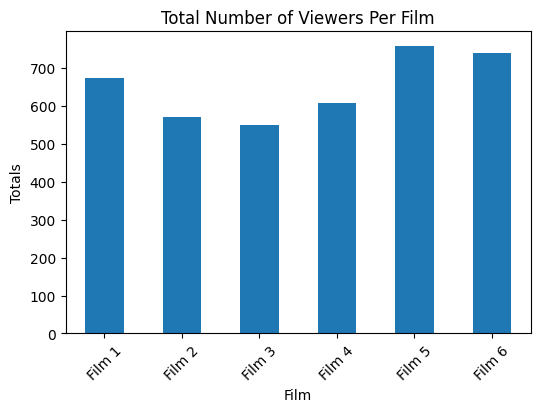

In [11]:
# Visualize how many respondents saw a particular film

labels = ['Film 1', 'Film 2', 'Film 3', 'Film 4', 'Film 5', 'Film 6']
x = np.arange(len(labels))  # location of labels

def bar_chart(df, main_title=None):
    df_chart = df.plot.bar(rot = 45)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(x, labels)
    plt.title(main_title)
    
    return df_chart

total_films_chart = bar_chart(total_films_seen, 'Total Number of Viewers Per Film')
plt.xlabel('Film')
plt.ylabel('Totals')
plt.show()

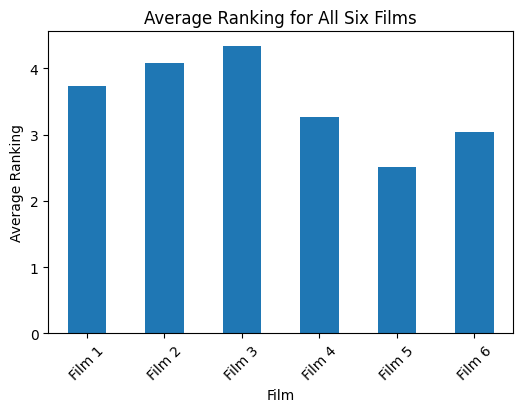

In [12]:
# Visualize how users ranked particular films

mean_film_ranking = bar_chart(rankings_mean, 'Average Ranking for All Six Films')
plt.xlabel('Film')
plt.ylabel('Average Ranking')
plt.show()

### Observations

- There is a positive correlation between the total number of viewers per film and the average film ranking. More respondents seeing a film increases the average ranking and vice versa.

- Film 5 has the most views and is the highest ranked. Film 3 is the least view and has the lowest average ranking.

- I **strongly disagree** with the participants. I loved the third film.

## 4. Analysis on Participants which Saw Every Film

We will now analyze respondents who have seen all six films. 

In [13]:
# Add a new column to sum the number of films a respondent has seen
star_wars['number_of_films_seen'] = star_wars[star_wars.columns[3:9]].sum(axis=1)

# Display how many users have seen all six films
seen_all = star_wars[star_wars['number_of_films_seen'] == 6]
unq_vals(seen_all, 1,3)

Seen_Star_Wars_Films value_counts
True    471
Name: Seen_Star_Wars_Films, dtype: int64 

Star_Wars_Fan value_counts
True     411
False     60
Name: Star_Wars_Fan, dtype: int64 



In [14]:
seen_all_rankings = seen_all[seen_all.columns[9:15]].mean()
seen_all_rankings

Film_Rank_1    4.237792
Film_Rank_2    4.326964
Film_Rank_3    4.253191
Film_Rank_4    2.866242
Film_Rank_5    2.380042
Film_Rank_6    2.932059
dtype: float64

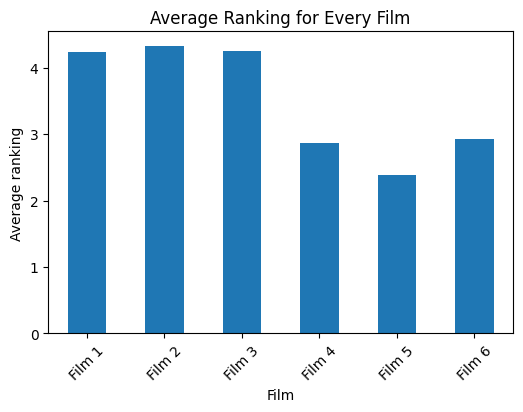

In [15]:
seen_all_rankings_chart = bar_chart(seen_all_rankings, 'Average Ranking for Every Film')
plt.xlabel('Film')
plt.ylabel('Average ranking')
plt.show()

### Observations

- About 50% of the respondents have seen all the six films of the franchise.

- There are 60 respondents who have seen all six films and who are not fans of the franchise.

- Those who have seen all the six films rank film 5 the highest and film 3 the lowest. This is consistent with the rankings of all the respondents including those who have seen at least one film.

## 5. Analysis by Gender

In this section, the data will be split into two groups based on whether a respondent is a male or female. We will analyse the most viewed and the highest-ranked movie separately for each gender.

In [16]:
# How many males and females are there?
star_wars["Gender"].value_counts(dropna= False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

In [17]:
# Categorize male and female repsonses
male_responses = star_wars[star_wars["Gender"] == "Male"]
female_responses  = star_wars[star_wars["Gender"] == "Female"]

# Look at unique values for males
unq_vals(male_responses, 1,3)

Seen_Star_Wars_Films value_counts
True     423
False     74
Name: Seen_Star_Wars_Films, dtype: int64 

Star_Wars_Fan value_counts
True     303
False    120
NaN       74
Name: Star_Wars_Fan, dtype: int64 



In [18]:
# And unique values for females
unq_vals(female_responses, 1,3)

Seen_Star_Wars_Films value_counts
True     397
False    152
Name: Seen_Star_Wars_Films, dtype: int64 

Star_Wars_Fan value_counts
True     238
False    159
NaN      152
Name: Star_Wars_Fan, dtype: int64 



In [25]:
# Percentage of males who have seen at least one film
male_perc = round(male_responses['Seen_Star_Wars_Films'].sum() / len(male_responses['Gender']) * 100)
print("Percentage of males who have seen any film: {} %.".format(male_perc))

Percentage of males who have seen any film: 85.0 %.


In [31]:
# Percentage of females who have seen at least one film
male_perc = round(female_responses['Seen_Star_Wars_Films'].sum() / len(female_responses['Gender']) * 100)
print("Percentage of females who have seen any film: {} %.".format(male_perc))

Percentage of females who have seen any film: 72.0 %.2f%.


In [32]:
# Percentage of males who have seen any film and are fans
male_per_and_fan = male_responses['Star_Wars_Fan'].sum() / male_responses['Seen_Star_Wars_Films'].sum() * 100
print("Percentage of males who have seen any film and are fans: {:.2f} %.".format(male_per_and_fan))

Percentage of males who have seen any film and are fans: 71.63 %.


In [34]:
# Percentage of females who have seen any film and are fans
female_per_and_fan = female_responses['Star_Wars_Fan'].sum() / female_responses['Seen_Star_Wars_Films'].sum() * 100
print("Percentage of males who have seen any film and are fans: {:.2f} %.".format(female_per_and_fan))

Percentage of males who have seen any film and are fans: 59.95 %.


### Observations

- The Gender column contains Male, Female values which represent the gender of a respondent and in some cases NaN where respondents did not answer. The data shows

    - Female respondents outnumbered male respondents.
    - Also, there were some missing values represented by NaN which was around 8% of the data. These values will be ignored in further analysis.
    
- Moreover, the Gender column shows more male respondents have seen at least one film more of the franchise than females have.
- Of the respondents who have seen at least one film, more males consider themselves as fans of the franchise than females.

In [36]:
# Display the totals for males
male_seen_totals = male_responses[male_responses.columns[3:9]].sum()
print(male_seen_totals)

Seen_Film_1    361
Seen_Film_2    323
Seen_Film_3    317
Seen_Film_4    342
Seen_Film_5    392
Seen_Film_6    387
dtype: int64


In [37]:
# Display the totals for females
female_seen_totals = female_responses[female_responses.columns[3:9]].sum()
print(female_seen_totals)

Seen_Film_1    298
Seen_Film_2    237
Seen_Film_3    222
Seen_Film_4    255
Seen_Film_5    353
Seen_Film_6    338
dtype: int64


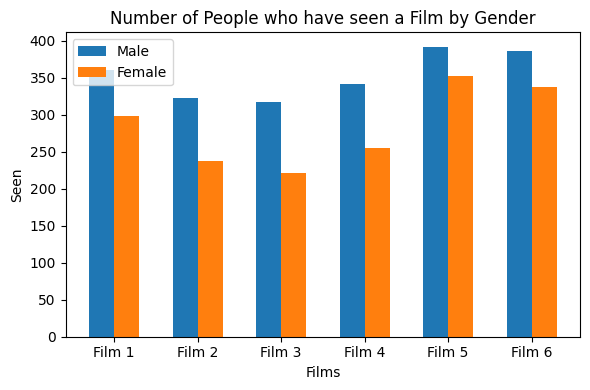

In [41]:
# Plot the films seen for male and female responders

width = 0.3  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, male_seen_totals, width, label='Male')
bars2 = ax.bar(x + width/2, female_seen_totals, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels.
ax.set_xlabel('Films')
ax.set_ylabel('Seen')
ax.set_title('Number of People who have seen a Film by Gender')
plt.xticks(x, labels)

ax.legend()
fig.tight_layout()

plt.show()

In [42]:
# Male rankings
male_rankings_mean = male_responses[male_responses.columns[9:15]].mean()
print(male_rankings_mean)

Film_Rank_1    4.037825
Film_Rank_2    4.224586
Film_Rank_3    4.274882
Film_Rank_4    2.997636
Film_Rank_5    2.458629
Film_Rank_6    3.002364
dtype: float64


In [43]:
# Female rankings
female_rankings_mean = female_responses[female_responses.columns[9:15]].mean()
print(female_rankings_mean)

Film_Rank_1    3.429293
Film_Rank_2    3.954660
Film_Rank_3    4.418136
Film_Rank_4    3.544081
Film_Rank_5    2.569270
Film_Rank_6    3.078086
dtype: float64


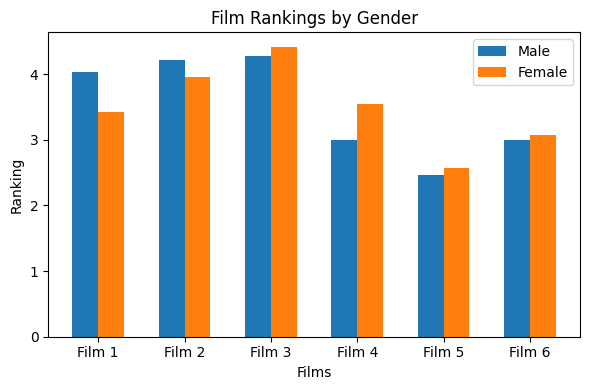

In [44]:
# Plot the film rankings for male and female responders

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, male_rankings_mean, width, label='Male')
bars2 = ax.bar(x + width/2, female_rankings_mean, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Films')
ax.set_ylabel('Ranking')
ax.set_title('Film Rankings by Gender')
plt.xticks(x, labels)

ax.legend()

fig.tight_layout()

plt.show()

### Observations

Further investigation of the Gender column with regards to the most viewed film and the highest-ranked film reveals that:

- The fifth film of the franchise is the most viewed amongst both groups of respondents: male and female.  
- Similarly, the most seen films are the highest ranked by each group and vice versa. 
- There appears to be a pattern where the highest-ranked film by each group is also the most viewed and the lowest-ranked film is the least watched. It appears there is correlation between the films seen and the film rank.
- Male respondents generally ranked the films 3, 4, 5 & 6 higher than female respondents. Interestingly, female respondents ranked films 1 & 2 higher than male respondents.  

## Conclusions

This project extends the analysis done by the project team at [FiveThirtyEight](https://fivethirtyeight.com/) in determining the best Star Wars film. The team hypothesized that **"The Empire Strikes Back"** is the best film and sought to verify that through a [survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) of American Star Wars fans. The six films are

- `The Phantom Menace`      - Film 1
- `Attack of the Clones`    - Film 2
- `Revenge of the Sith`     - Film 3
- `A New Hope`             - Film 4
- `The Empire Strikes Back` - Film 5
- `Return of the Jedi`      - Film 6

We analyzed the data collected by the team. The analysis in this project took the following approaches: 

1. A general analysis was made on the entire dataset to determine the most watched and the highest-ranked film. 
2. We cleaned the dataset and renamed some of the columns.
3. We also segmented the data based on the gender of the respondents.
4. And we analyzed respondents who have seen all six Star Wars films.

The findings in this project reveal that:

1. Generally, the most watched film is **"The Empire Strikes Back"**. It is also the highest-ranked film amongst all respondents.
2. **"The Empire Strikes Back"** is also the most watched and highest-ranked film amongst respondents who have seen all six films of the franchise.
3. Similarly, the most watched and highest-ranked film is **"The Empire Strikes Back"** amongst both male and female respondents.

The findings in this current project is consistent with the hypothesis and [findings](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) of the team at FiveThirtyEight. 